# Snelheid voertuig uit positie berekenen

### Inleiding
Gegeven de posities van voertuigen op verschillende momenten in de tijd kunnen de snelheden
van deze voertuigen worden berekend.
Dit soort simulaties worden vaak uitgevoerd om de doorstroming op verkeersknooppunten te kunnen berekenen.  
In deze opdracht wordt uitgegaan van een rechte weg waarop auto's rijden.
Voor elke auto wordt per deciseconde opgeslagen waar de auto zich bevind.
Deze data wordt opgeslagen in een csv bestand.  
Voor deze opdracht moet voor elke auto de maximum en minimum snelheid worden berekend.
Ook moet er een grafiek worden gemaakt van de snelheden van alle voertuigen over de gegeven tijdsperiode in het bestand.

### Aanpak
Om van afstand en tijd naar snelheid te komen kan de volgende formule toegepast worden:  
$v(t) = \frac{\Delta m}{\Delta t}$  
Aangezien in het csv bestand elke 0.1 seconde een nieuwe meting plaatsvindt kan dat ingevuld worden als $\Delta t$.
De formule die gebruikt wordt om de snelheid te berekenen kan dus als volgt worden herschreven:  
$v(t) = \frac{m_{nieuw} - m_{oud}}{0.1}$  
Door deze formule iedere 0.1 seconde uit te voeren en de uitkomsten te plotten in een grafiek
wordt er een beeld geschetst van de snelheden per auto over een bepaalde tijd.

### Uitwerking
Aangezien er in de data meerdere auto's worden bijgehouden is er gekozen om voor een auto een klasse te maken.
Hierdoor kan er voor elke auto zijn eigen object worden aangemaakt, wat als voordeel heeft dat er per
auto gemakkelijk data kan worden opgeslagen.  

In [5]:
import csv
import matplotlib.pyplot as plt


class Vehicle:
    """
    This class represents a vehicle with a unique id number
    """
    def __init__(self, col_num, last_pos):
        self.last_position = float(last_pos)
        self.col_id = int(col_num)
        self.max_velocity = 0.0
        self.min_velocity = 100.0
        self.velocity_list = []
        
        
    def set_max_velocity(self, velo):
        """Compares the given value with the current velocity and takes the greatest velocity"""
        if velo > self.max_velocity:
            self.max_velocity = velo
        
    def get_max_velocity(self):
        """Returns the max velocity"""
        return self.max_velocity
    
    def set_min_velocity(self, velo):
        """Compares the given value with the current velocity and takes the smallest velocity"""
        if velo < self.min_velocity:
            self.min_velocity = velo
    
    def get_min_velocity(self):
        """Returns the min velocity"""
        return self.min_velocity
    
    def set_velocity_list(self, pos):
        """Calculates the velocity with two positions and adds them into a list"""
        # Calculate the new velocity
        new_velocity = abs((pos - self.last_position)/0.1)
        
        # add the velocity into a list and update the position
        self.velocity_list.append(new_velocity)
        self.last_position = pos
        
        # update the max en min velocity if possible
        self.set_max_velocity(new_velocity)
        self.set_min_velocity(new_velocity)
        
    def get_velocity_list(self):
        """Returns a list with all the velocities of said vehicle"""
        return self.velocity_list


Onder de variabele $file\_name$ wordt de naam van het csv bestand opgegeven.
Hierna wordt dit bestand geopend en doorlopen.  
Per iteratie wordt er een method aangeroepen van de klasse met als parameter de huidige positie.
Met behulp van deze parameter en de eerder opgeslagen vorige positie kan dan de snelheid berekend worden.  
Nadat de snelheid is berekend wordt deze opgeslagen in de snelheden lijst van het auto object en worden alle
variabelen zodoende aangepast dat ze weer bijgewerkt zijn voor de volgende iteratie.


In [7]:
file_name = "verkeerssimulatie-rechteweg-posities.csv"

with open(file_name, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # initialize a list of vehicles
    vehicle_list = []
    
    # initialize a count variable
    time_count = 0
    is_first_row = True
    
    # Iterate over every row in the csv file
    for row in csv_reader:
        if is_first_row:
            # in the first row the objects are created
            for car in range(1, len(row)):
                # Create a new Vehicle object and add it into the vehicle list
                vehicle_list.append(Vehicle(car, row[car]))
            is_first_row = False
        else:
            # the objects are already created
            for car in vehicle_list:
                
                # 
                position = float(row[car.col_id])
                car.set_velocity_list(position)
        
        # increment count variable
        time_count += 1
    
# printing min max per vehicle
for car in vehicle_list:
    print("Vehicle: {0}\nMax velocity: {1}\nMin velocity: {2}\n".format(
        car.col_id, car.get_max_velocity(), car.get_min_velocity()
    ))


Vehicle: 1
Max velocity: 6.3500000000004775
Min velocity: 1.269999999999527

Vehicle: 2
Max velocity: 2.0000000000000284
Min velocity: 0.0



Wanneer het gehele csv bestand is doorlopen zijn alle snelheden van een auto object opgeslagen in een lijst.
Deze snelheden zullen nu in een grafiek geplot moeten worden.  
Allereerst wordt er gezocht naar het bereik en de limiet van de x en y assen.
Hierna wordt er per auto object de snelheid lijst opgevraagd en geplot.
Om wat meer overzicht te creeëren is in de eerste grafiek de snelheid over de eerste 20 seconden geplot.
In de tweede grafiek wordt de snelheid over de totale tijd geplot.


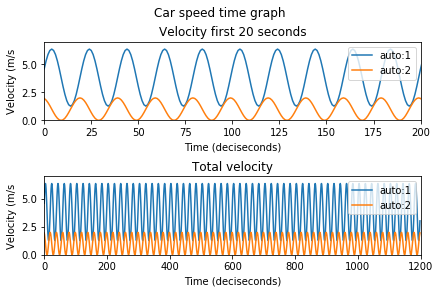

In [8]:
# variables for calculating the min and max range
max_y = 0.0
min_y = 100.0
short_graph_time = 200

# calculating the min and max range
for car in vehicle_list:
    if car.get_max_velocity() > max_y:
        max_y = car.get_max_velocity()
    if car.get_min_velocity() < min_y:
        min_y = car.get_min_velocity()

# plotting the figure
fig, axs = plt.subplots(2, 1, constrained_layout=True)

# add a title
fig.suptitle("Car speed time graph")

# the first subplot setup (first 20 seconds)
axs[0].set_title("Velocity first 20 seconds")
axs[0].set_xlabel("Time (deciseconds)")
axs[0].set_ylabel("Velocity (m/s")
axs[0].set_xlim(0, short_graph_time)
axs[0].set_ylim(int(min_y), int(max_y) + 1)

# the second subplot setup (overall)
axs[1].set_title("Total velocity")
axs[1].set_xlabel("Time (deciseconds)")
axs[1].set_ylabel("Velocity (m/s")
axs[1].set_xlim(0, time_count)
axs[1].set_ylim(int(min_y), int(max_y) + 1)

# plotting the velocities
for x in range(0, len(axs)):
    for car in vehicle_list:
        axs[x].plot(car.get_velocity_list(), label='auto:{0}'.format(car.col_id))
    # adding the legend
    axs[x].legend(loc='upper right')
